In [44]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [45]:
train_data=pd.read_csv("train.csv")

In [46]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
print("-----Train Data----")
print(f"Number of Rows: {train_data.shape[0]} \nNumber of Columns: {train_data.shape[1]}")

-----Train Data----
Number of Rows: 891 
Number of Columns: 12


In [48]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [52]:
train_data=train_data.drop(columns=['Name'])

In [53]:
train_data=train_data.drop(columns=['Pclass'])

In [54]:
train_data=train_data.drop(columns=['SibSp'])

In [55]:
train_data=train_data.drop(columns=['Fare'])

In [56]:
train_data=train_data.drop(columns=['Cabin'])

In [57]:
train_data=train_data.drop(columns=['Embarked'])

In [58]:
train_data=train_data.drop(columns=['Ticket'])

In [59]:
train_data=train_data.drop(columns=['Parch'])

In [60]:
train_data=train_data.drop(columns=['PassengerId'])

In [61]:
train_data=train_data.drop(columns=['Age'])

In [62]:
train_data

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


In [75]:
def fillNaObjMode(cols):
    for i in cols:
        train_data[i] = train_data[i].fillna(train_data[i].mode()[0])

columns = ['Sex']
fillNaObjMode(columns)

In [76]:
def dataEncoder(cols):
    for i in cols:
        dataLabelEncoder = LabelEncoder()
        train_data[i] = dataLabelEncoder.fit_transform(train_data[i])

columns = ['Sex']
dataEncoder(columns)

In [78]:
trainData, testData = train_test_split(train_data, test_size=0.2, shuffle=False)

In [79]:
trainData.shape

(712, 2)

In [80]:
testData.shape

(179, 2)

In [81]:
train_x = trainData.iloc()[:, 1:]
test_x  = testData.iloc()[:, 1:]

train_y = trainData.iloc()[:, 0]
test_y  = testData.iloc()[:, 0]

In [82]:
train_x.head(2)

,Sex
0,1
1,0


In [83]:
train_y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [84]:
test_x.head(2)

,Sex
712,1
713,1


In [85]:
test_y.head(2)

712    1
713    0
Name: Survived, dtype: int64

In [86]:
model_svc = SVC()
model_svc.fit(train_x, train_y)

print(model_svc)

SVC()


In [88]:
model_predictions = model_svc.predict(test_x)

In [100]:
model_accuracy_score = accuracy_score(test_y, model_predictions)

print("-- Model Accuracy Score: ", end='')
print(round(model_accuracy_score,2))

-- Model Accuracy Score: 0.8


In [101]:
testdata_predict = testData.copy(deep=True)
pd.options.mode.chained_assignment = None

testdata_predict['Prediction'] = model_predictions

In [102]:
model_accuracy_score = accuracy_score(testdata_predict['Survived'], testdata_predict['Sex'])

print("-- Model Accuracy Score: ", end='')
print(round(model_accuracy_score,2))

-- Model Accuracy Score: 0.2


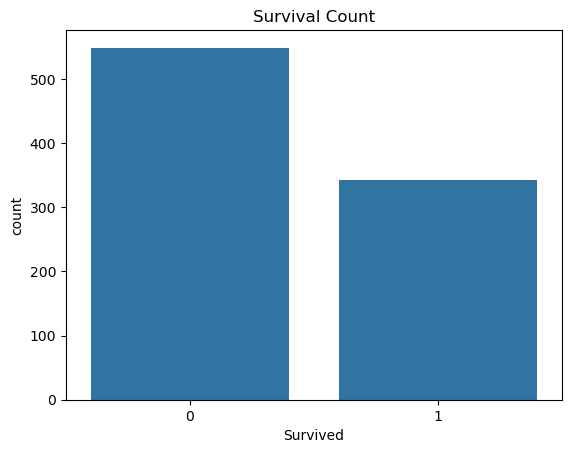

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=train_data, x='Survived')
plt.title('Survival Count')
plt.show()

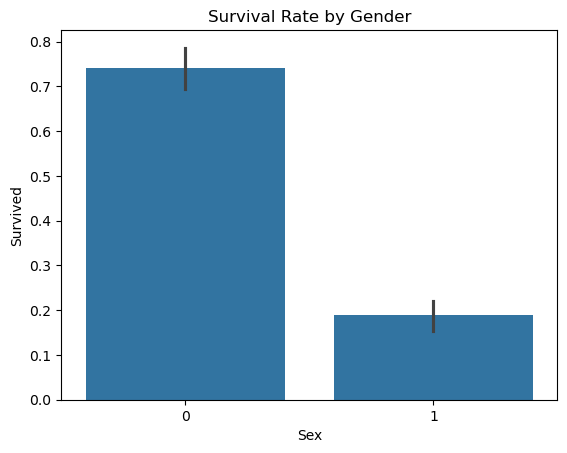

In [105]:
sns.barplot(data=train_data, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.show()